In [312]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [315]:
df=pd.read_csv("final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [318]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [320]:
df.shape

(10754, 22)

In [321]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### [[explanation of each column in your dataset:]]

##### player_id: A unique identifier for each player.
##### team: The team the player belongs to.
##### name: The name of the player.
##### position: The playing position of the player (e.g., forward, midfielder, defender).
##### height: The height of the player, likely in meters or centimeters, represented as a float.
##### age: The age of the player, an integer value.
##### appearance: The number of appearances or matches the player has played.
##### goals: The total number of goals the player has scored.
##### assists: The total number of assists provided by the player.
##### yellow cards: The number of yellow cards the player has received.
##### second yellow cards: The number of second yellow cards leading to expulsion (red card).
##### red cards: The total number of red cards received by the player.
##### goals conceded: The number of goals the player has allowed (likely for goalkeepers or defenders).
##### clean sheets: The number of games where the player (usually a goalkeeper or defender) did not allow any goals.
##### minutes played: Total minutes the player has spent on the field in matches.
##### days_injured: Total number of days the player has been injured.
##### games_injured: Total number of games the player missed due to injury.
##### award: Number of awards or distinctions the player has received.
##### current_value: The current market value of the player (likely in a specific currency, such as euros or dollars).
##### highest_value: The highest market value the player has achieved in their career.
##### position_encoded: A numerical encoding of the player's position for analysis or modeling.
##### winger: A binary or categorical variable indicating whether the player is a winger or not (likely coded as 1 for "Yes" and 0 for "No").

## Preprocessing the Data

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

##### data source publish this data from  players competing in several top-tier global football leagues:
##### 11 European leagues, including the Premier League and Championship in England, Bundesliga in Germany, La Liga in Spain, Serie A in Italy, Ligue 1 in France, Eredivisie in the Netherlands, Liga NOS in Portugal, Premier Liga in Russia, Super Lig in Turkey, and Bundesliga in Austria.
##### 4 American leagues, including Brasileiro in Brazil, Major League Soccer in the United States, Primera División in Argentina, and Liga MX in Mexico.
##### 1 African league, namely the DStv Premiership in South Africa.
##### 4 Asian leagues, comprising J-League in Japan, Saudi Pro League in Saudi Arabia, K-League 1 in South Korea, and A-League in Australia.


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

##### data is not up to date , it is in 2 season 2021-2022 and 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


##### data is consistent and has only one file 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [333]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [335]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [338]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


##### 1. Change the player column into integer by spliting the column and extract only the id number
##### then check its uniqueness and change it to int datatype 
##### then rename the column to player_id

In [340]:
df['player']=df['player'].str.split("/").apply(lambda x : x[4] if len(x) >=4 else  None)

In [342]:
df['player'].nunique()

10754

In [343]:
df['player'].duplicated().sum()

0

In [344]:
df['player']=df['player'].astype(int)

In [346]:
df['player'].dtypes

dtype('int32')

In [347]:
df.rename(columns={"player":"player_id"},inplace =True)

In [348]:
df

,player_id,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [349]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [350]:
df['name'].value_counts()

name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64

In [351]:
df['height']=df['height'].round(2)

In [352]:
df['age']=df['age'].astype(int)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            10754 non-null  int32  
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  int32  
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [354]:
df.head(6)

,player_id,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,59377,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,128899,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0


In [355]:
df['goals']=df['goals'].astype(int)

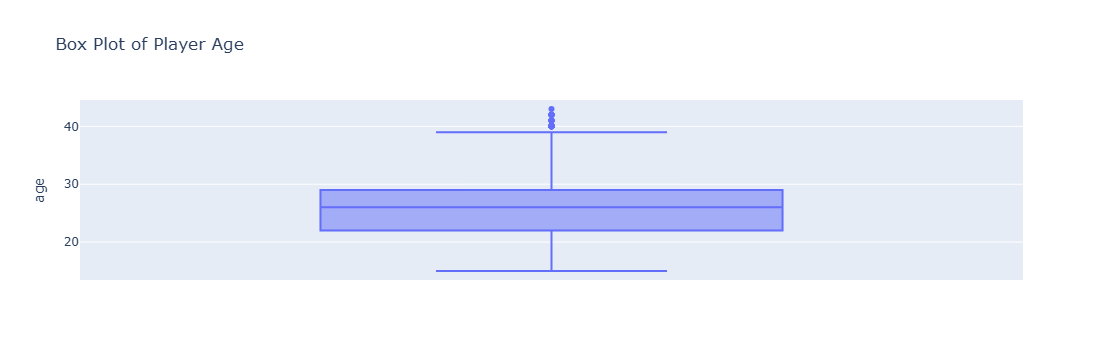

In [356]:
# check outliers
fig = px.box(df, y='age', title="Box Plot of Player Age")

# Show the plot
fig.show() # I will consider 40 as outlier

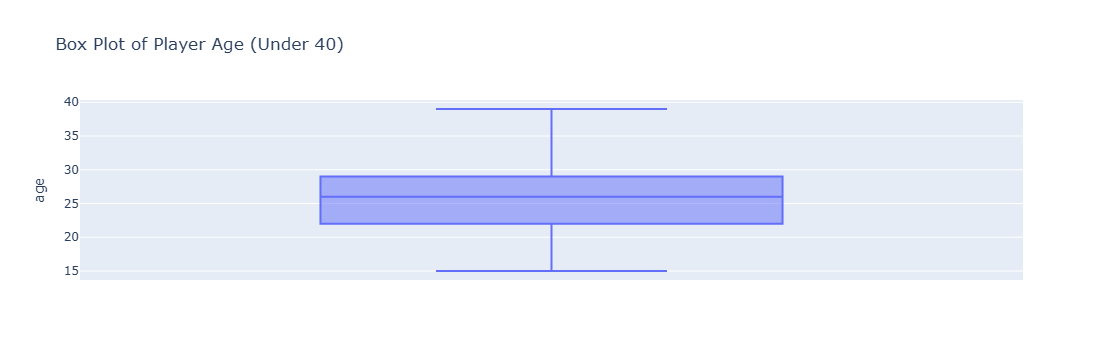

In [357]:
df_filtered = df[df['age'] < 40]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='age', title="Box Plot of Player Age (Under 40)")

# Show the plot
fig.show()

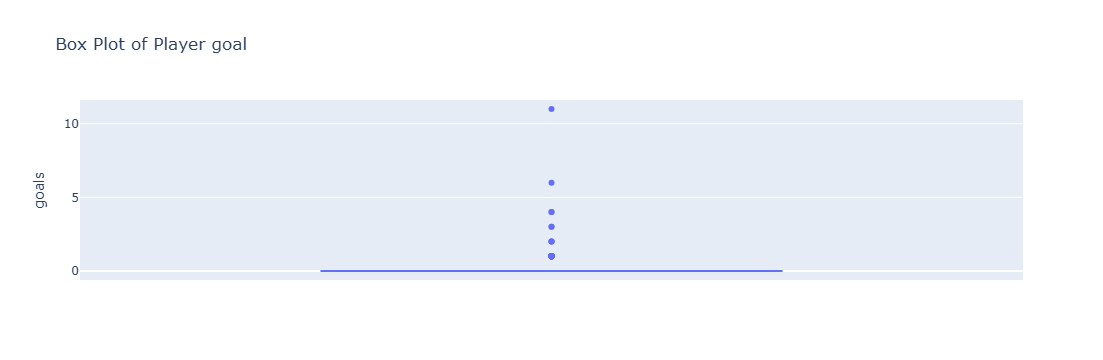

In [358]:
# check outliers
fig = px.box(df, y='goals', title="Box Plot of Player goal")

# Show the plot
fig.show() 

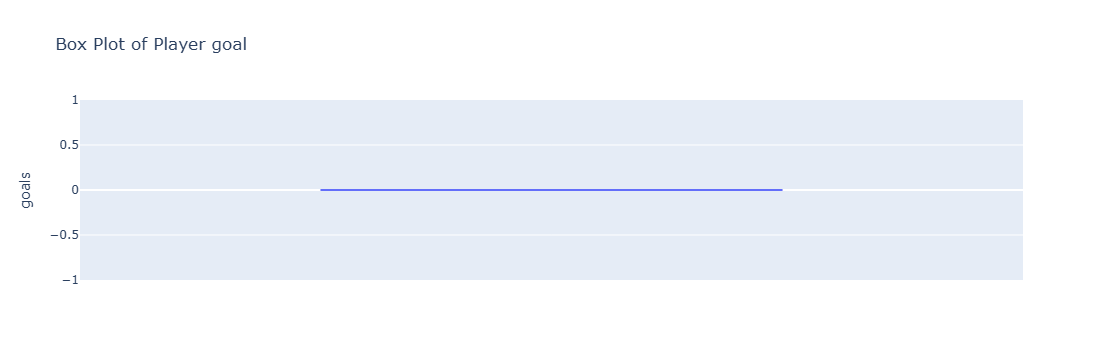

In [359]:
df_filtered = df[df['goals'] <1]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='goals', title="Box Plot of Player goal ")

# Show the plot
fig.show()

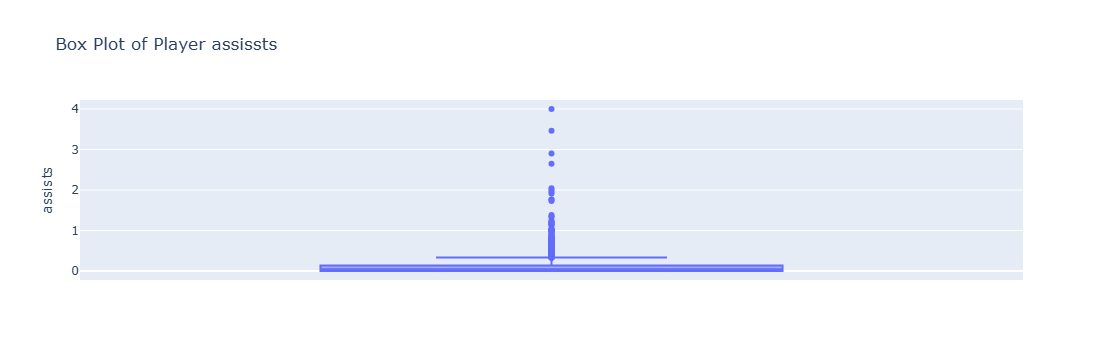

In [360]:
# check outliers
fig = px.box(df, y='assists', title="Box Plot of Player assissts")

# Show the plot
fig.show() 

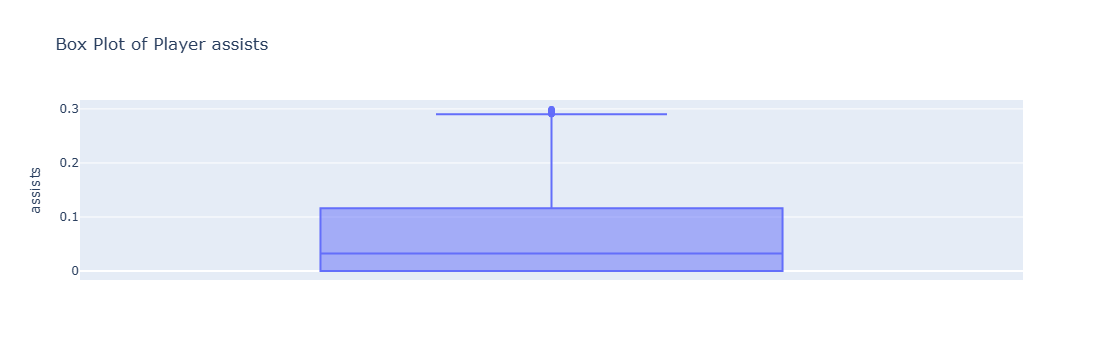

In [384]:
df_filtered = df[df['assists'] <.3]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='assists', title="Box Plot of Player assists ")

# Show the plot
fig.show()

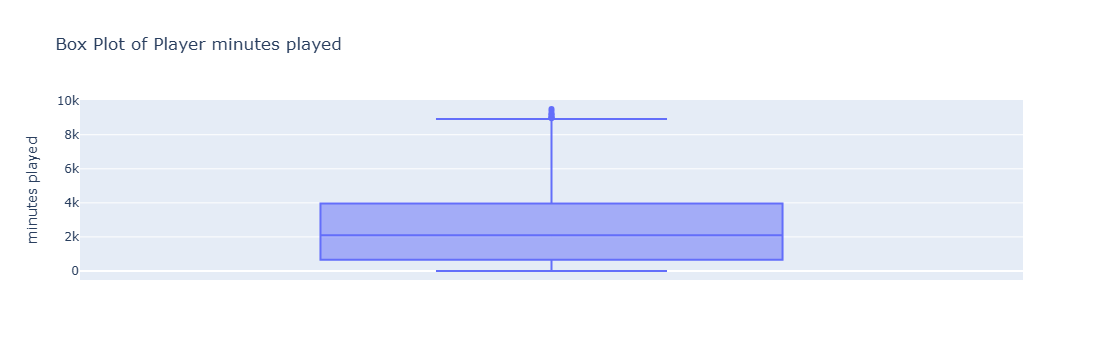

In [385]:
# check outliers
fig = px.box(df, y='minutes played', title="Box Plot of Player minutes played")

# Show the plot
fig.show() 

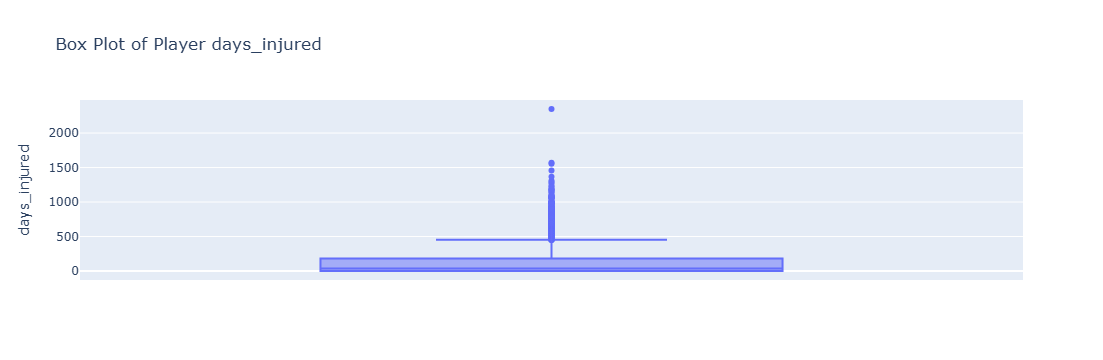

In [386]:
# check outliers
fig = px.box(df, y='days_injured', title="Box Plot of Player days_injured")

# Show the plot
fig.show() 

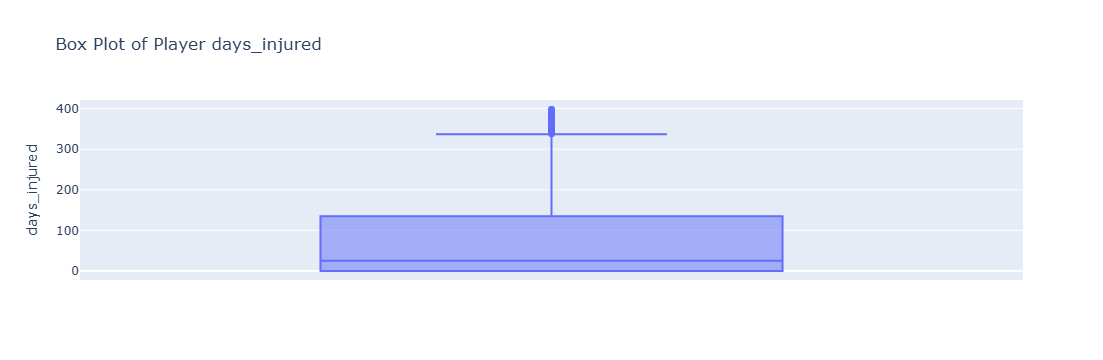

In [389]:
df_filtered = df[df['days_injured'] <400]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='days_injured', title="Box Plot of Player days_injured ")

# Show the plot
fig.show()

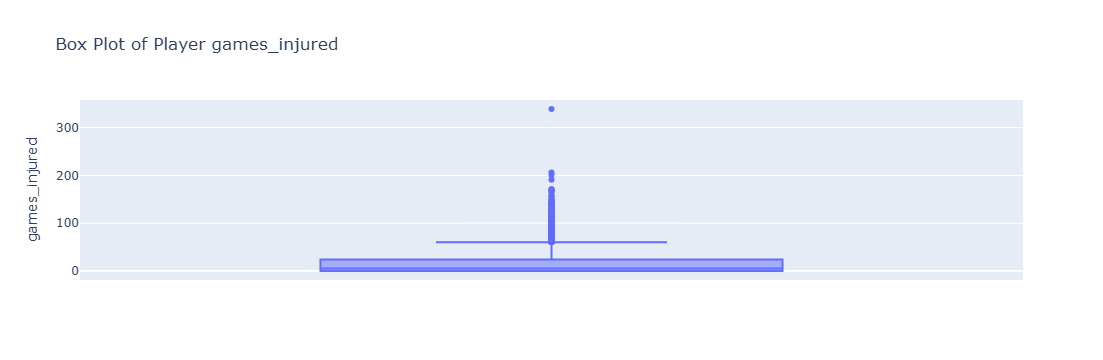

In [392]:
# check outliers
fig = px.box(df, y='games_injured', title="Box Plot of Player games_injured")

# Show the plot
fig.show() 

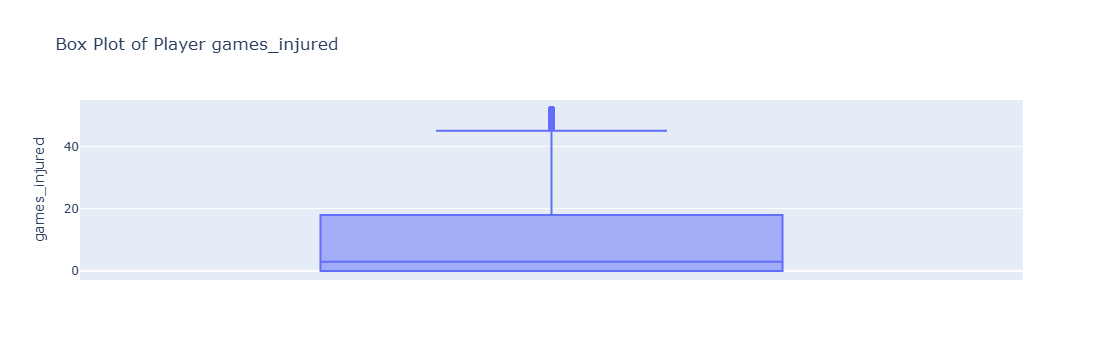

In [394]:
df_filtered = df[df['games_injured'] <53]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='games_injured', title="Box Plot of Player games_injured ")

# Show the plot
fig.show()

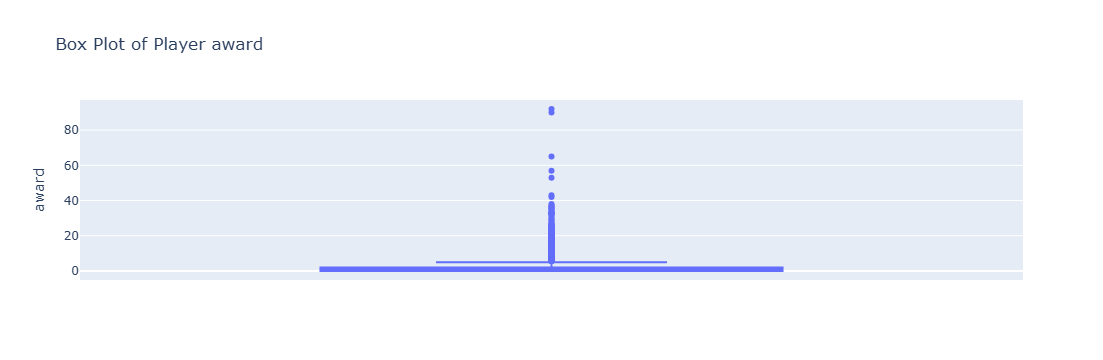

In [396]:
# check outliers
fig = px.box(df, y='award', title="Box Plot of Player award")

# Show the plot
fig.show() 

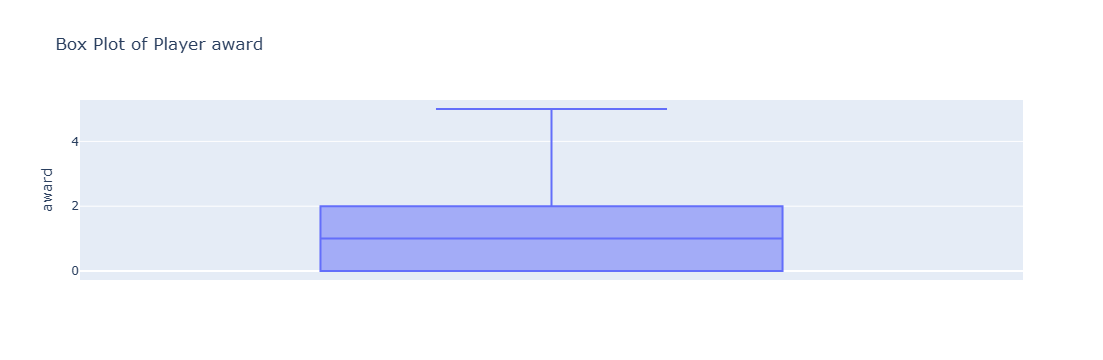

In [398]:
df_filtered = df[df['award'] <6]

# Create a box plot for the filtered data
fig = px.box(df_filtered, y='award', title="Box Plot of Player award ")

# Show the plot
fig.show()

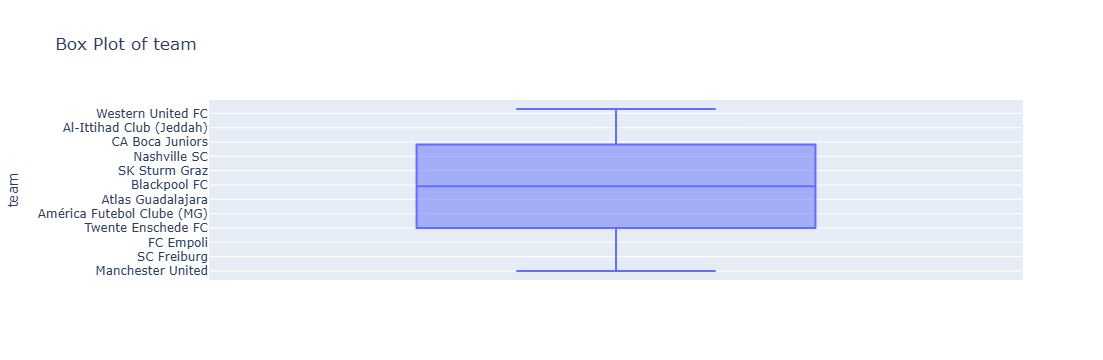

In [400]:
# check outliers
fig = px.box(df, y='team', title="Box Plot of team")

# Show the plot
fig.show() 

### Predicting Current Player Value (current_value)
#### Dependent Variable: current_value
#### Independent Variables: age, goals, assists, minutes played, days_injured, games_injured, award, team

##### 1. Before we start feeding the model with data , we want to check the selected independent features correlations, and ommit any feature that is highly correlated to another one 

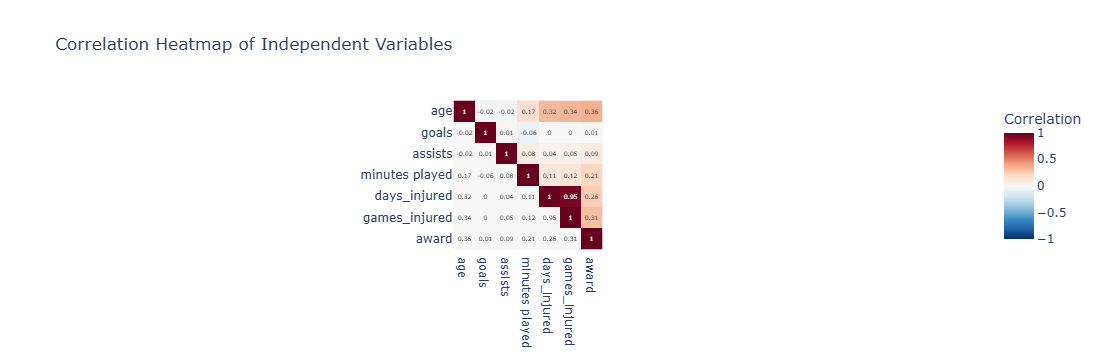

In [407]:
# check correlation betweeen the feature 

# Define the independent variables
independent_vars = ['age', 'goals', 'assists', 'minutes played', 'days_injured', 'games_injured', 'award']

# Calculate the correlation matrix
corr_matrix = df_encoded[independent_vars].corr()

# Convert the correlation matrix to a format compatible with Plotly
corr_matrix_np = np.triu(corr_matrix)  # Take the upper triangle of the matrix for better visualization

# Create a heatmap using Plotly
fig = px.imshow(corr_matrix_np, 
                x=independent_vars, 
                y=independent_vars, 
                color_continuous_scale='RdBu_r', 
                zmin=-1, zmax=1, 
                labels={'color':'Correlation'},
                title="Correlation Heatmap of Independent Variables")

# Add annotations to the heatmap (show correlation values)
fig.update_traces(text=corr_matrix.round(2), texttemplate="%{text}")

# Show the plot
fig.show()

##### game_injured is highly correlated with days_injured so we will take only one of them 


##### 2. Now we will encode the categorical column team and make feature engneering to our columns by scaling 

In [431]:
# Assuming df is your DataFrame and 'team' is already encoded using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['team'], drop_first=True)

# Define the dependent (target) variable
y = df_encoded['current_value']

# Define the independent variables (X) again before scaling
X = df_encoded[['age', 'goals', 'assists', 'minutes played', 'days_injured', 'award'] + 
               [col for col in df_encoded.columns if 'team_' in col]]

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training independent variables and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

##### 3. Start regression model using fit object in regression class

In [425]:


# Initialize and train the regression model on the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 42308347744796.95
R-squared: 0.5321668346312503


##### The Mean Squared Error represents the average squared difference between the actual and predicted values.
##### In our case, the MSE is very high, suggesting that there is still a significant difference between the predicted player values and their actual values. The large number indicates that the prediction errors are substantial, which could be due to several factors, including the model's complexity, feature selection, or potential outliers in the data.


##### The R-squared (R²) measures how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1:
##### 1 indicates that the model perfectly explains all variance in the target variable.
##### 0 means none of the variance is explained by the model.
##### result of 0.532 means that 53.2% of the variance in the player’s current value (current_value) is explained by the independent variables (age, goals, assists, etc.). While this is a moderate value, it also indicates that there is still 46.8% of unexplained variability, suggesting that the model could be improved.